In [1]:
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [2]:
# parameter names of the statistics we want to show
params = ["Goals", "Shots", "Shots on Target", "Fouls Commited", "Offsides", "Crosses", "Tackles Won", "Interceptions",
         "Yellow Cards"]

# The lower and upper boundaries for the statistics
low =  [1, 10 ,3, 0.05, 0.2, 0.7, 0.5, 75.0, 18.0, 250.0, 0.0, 0.0]
high = [2, 15, 6, 1.00, 0.3, 1.0, 1.0, 85.0, 30.0, 350.0, 5, 1.0]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Yellow Cards', "Offsides", "Fouls Commited"]

england_values = [3, 9, 6, 8, 0, 7, 6, 12, 0]
italy_values =   [1, 15, 4, 15, 1, 7, 12, 8, 3]

In [3]:
x1 = england_values
x2 = italy_values
x3 = zip(x1, x2)

min_x = []
max_x = []
for t1, t2 in x3:
    if t1 > t2:
        min_x.append(t2*0.95)
        max_x.append(t1*1.05)
    elif t1 < t2:
        min_x.append(t1*0.95)
        max_x.append(t2*1.05)
    elif t1 == t2 and t1 != 0:
        min_x.append(t1*0.95)
        max_x.append(t1*1.05)
    elif t1 == t2 == 0:
        min_x.append(0)
        max_x.append(1)

In [4]:
low = min_x
high = max_x

In [5]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [6]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

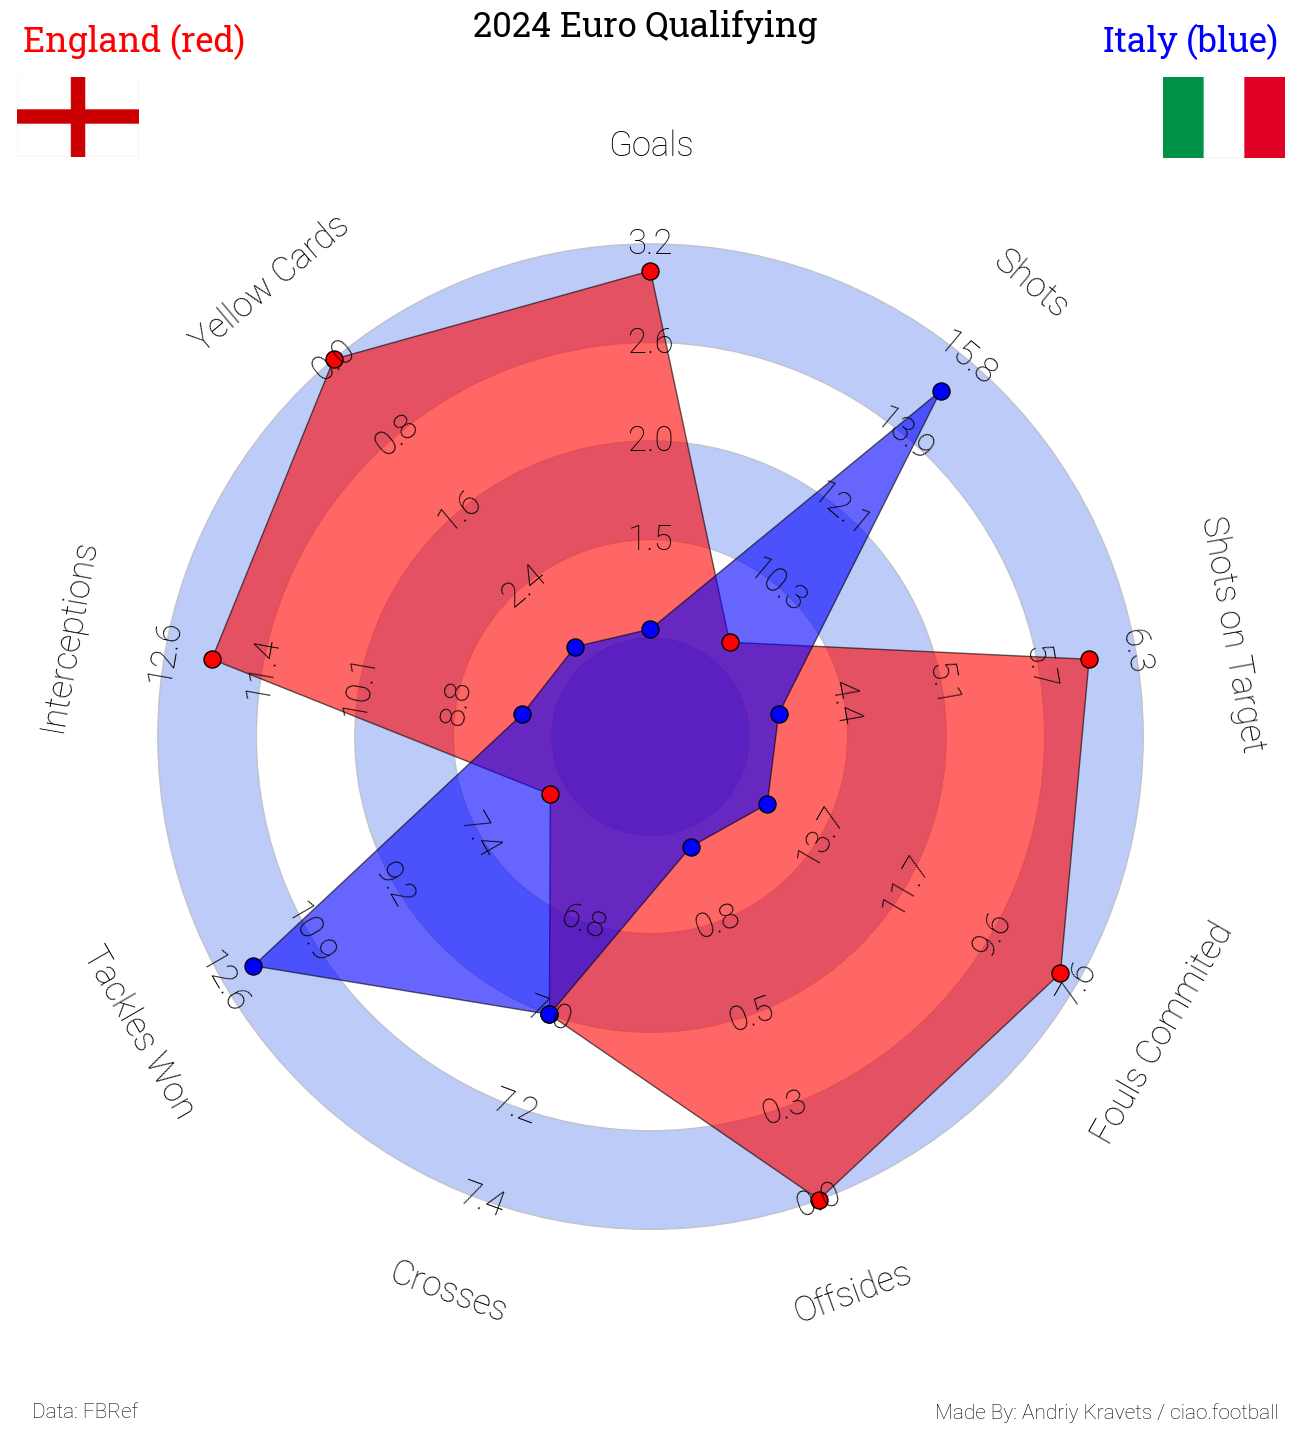

In [12]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'], facecolor='None')  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#bccbf7', edgecolor='#c0c3cc')
radar_output = radar.draw_radar_compare(england_values, italy_values, ax=axs['radar'], 
                                        kwargs_radar={'facecolor': 'red', 'alpha': 0.6, 'edgecolor': 'black'},
                                        kwargs_compare={'facecolor': 'blue', 'alpha': 0.6, 'edgecolor': 'black'})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='red', edgecolors='black', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='blue', edgecolors='black', marker='o', s=150, zorder=2)

#fig.set_facecolor('#121212')

#spokes = radar.spoke(ax=axs['radar'])

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
#endnote_text = axs['endnote'].text(0.99, 0.7, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                            #       fontproperties=robotto_thin.prop, ha='right', va='center')
endnote_text = axs['endnote'].text(0.99, 0.0, 'Made By: Andriy Kravets / ciao.football', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
endnote_text = axs['endnote'].text(0.1, 0.0, 'Data: FBRef', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'England (red)', fontsize=25, color='red',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
#title2_text = axs['title'].text(0.01, 0.25, 'England', fontsize=20,
                              #  fontproperties=robotto_thin.prop,
                              #  ha='left', va='center', color='red')
title3_text = axs['title'].text(0.99, 0.65, 'Italy (blue)', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='blue')
#title4_text = axs['title'].text(0.99, 0.25, 'England', fontsize=20,
 #                               fontproperties=robotto_thin.prop,
  #                              ha='right', va='center', color='blue')

title5_text = axs['title'].text(0.63, 0.83, '2024 Euro Qualifying', fontsize=25,
                            fontproperties=robotto_bold.prop,
                               ha='right', va='center', color='black')

from PIL import Image
from urllib.request import urlopen
from mplsoccer import add_image

URL2 = "https://cdn.britannica.com/44/344-004-494CC2E8/Flag-England.jpg"
england_cropped = Image.open(urlopen(URL2))

URL3 = "https://cdn.britannica.com/59/1759-004-F4175463/Flag-Italy.jpg"
italy_cropped = Image.open(urlopen(URL3))

# add image

ax_image = add_image(
    italy_cropped, fig, left=0.88, bottom=0.88, width=0.09, height=0.09
)   # these values might differ when you are plotting

ax_image = add_image(
    england_cropped, fig, left=0.03, bottom=0.88, width=0.09, height=0.09
)   # these values might differ when you are plotting